# ipwidget を用いたインターラクティブな値の設定

ipywidgets パッケージを用いると，Jupyter notebook で変数の値を変化させながらプログラムを実行させる
ウィジェット（グラフィカルユーザーインターフェース(GUI)の部品）を利用できます。

詳細は，次のドキュメントを見てください。

https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

スライダーで値を設定すると，slider.value の値がその値になっています。

In [46]:
import ipywidgets as widgets
slider = widgets.IntSlider()
display(slider)
slider.value

IntSlider(value=0)

0

In [47]:
slider.value

0

In [48]:
import ipywidgets as widgets
vslider = widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=2,
    description='Test:',
    orientation='vertical',
)
display(vslider)
vslider.value

IntSlider(value=7, description='Test:', max=10, orientation='vertical', step=2)

7

In [49]:
vslider.value

7

In [50]:
dd =  widgets.Dropdown(
    options=['One', 'Two', 'Three'],
    description='Number:',
)
display(dd)

Dropdown(description='Number:', options=('One', 'Two', 'Three'), value='One')

In [51]:
dd.value

'One'

# Interact の利用

インターラクティブな値を利用するのには，Interact が便利です。自動的に一番適した Widget が作成され，
値が変化すると，そのたびに，新しい値が関数に適用されます。

In [52]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [53]:
def f(x=40):
    return (x*x)

In [54]:
interact(f, x=40);

interactive(children=(IntSlider(value=40, description='x', max=120, min=-40), Output()), _dom_classes=('widget…

In [55]:
def g(x):
    print(x)
    print (x*x)

In [56]:
interact(g, x=10.0);

interactive(children=(FloatSlider(value=10.0, description='x', max=30.0, min=-10.0), Output()), _dom_classes=(…

In [57]:
interact(f, x=widgets.IntSlider(min=0, max=30, step=2, value=0));


interactive(children=(IntSlider(value=0, description='x', max=30, step=2), Output()), _dom_classes=('widget-in…

In [58]:
interact(f, x=(0,30,2));

interactive(children=(IntSlider(value=30, description='x', max=30, step=2), Output()), _dom_classes=('widget-i…

In [59]:
def h(n, x):
    print(f"I have {n} {x}.")
    
interact(h, x=['apples','oranges'], n=(1,3,1));

interactive(children=(IntSlider(value=2, description='n', max=3, min=1), Dropdown(description='x', options=('a…

# Matplotlib と微分方程式の数値的解法


# matplotlib によるグラフの描画

numpy で数値計算した結果を、matplotlib で描画することを考えましょう。
第1回で与えた例題は、次のものでした。

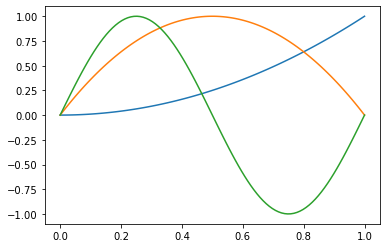

In [60]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.plot(x, x*x)
plt.plot(x, 4*x*(1-x))
plt.plot(x, np.sin(2*np.pi*x))
#plt.show()

```
np.linspace(0, 1, 100)
```
は、[0,1] 区間を 100 等分float の長さ 100 の実数の ndarray を返します。 

In [61]:
x = np.linspace(0, 1, 100)
print(x.shape)
print(x.dtype)
print(x)

(100,)
float64
[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.8

`x*x` は，np の ndarray の積なので，要素の積をとった ndarray になります。

In [62]:
print(x*x)

[0.00000000e+00 1.02030405e-04 4.08121620e-04 9.18273646e-04
 1.63248648e-03 2.55076013e-03 3.67309458e-03 4.99948985e-03
 6.52994592e-03 8.26446281e-03 1.02030405e-02 1.23456790e-02
 1.46923783e-02 1.72431385e-02 1.99979594e-02 2.29568411e-02
 2.61197837e-02 2.94867871e-02 3.30578512e-02 3.68329762e-02
 4.08121620e-02 4.49954086e-02 4.93827160e-02 5.39740843e-02
 5.87695133e-02 6.37690032e-02 6.89725538e-02 7.43801653e-02
 7.99918376e-02 8.58075707e-02 9.18273646e-02 9.80512193e-02
 1.04479135e-01 1.11111111e-01 1.17947148e-01 1.24987246e-01
 1.32231405e-01 1.39679625e-01 1.47331905e-01 1.55188246e-01
 1.63248648e-01 1.71513111e-01 1.79981635e-01 1.88654219e-01
 1.97530864e-01 2.06611570e-01 2.15896337e-01 2.25385165e-01
 2.35078053e-01 2.44975003e-01 2.55076013e-01 2.65381084e-01
 2.75890215e-01 2.86603408e-01 2.97520661e-01 3.08641975e-01
 3.19967350e-01 3.31496786e-01 3.43230283e-01 3.55167840e-01
 3.67309458e-01 3.79655137e-01 3.92204877e-01 4.04958678e-01
 4.17916539e-01 4.310784

`plt.plot` は、x 座標と y 座標のリストをもらい、その点をつないだグラフを描画するように説明しましたが、リストの代わりに、ndarray も引数としてとることができます。よって、x, x*x を引数として ndarray を呼び出すとこのように描画が行われます。

matplotlib には、グラフをきれいに描画するためのいろんな設定があります。例えば、上のグラフで縦軸と横軸が均一にすることは、
plt.axis('scaled')
でできます。また、x, y の範囲を指定することは、
plt.axis([-0.5,1.5,0.0,2.0])
でできます。plt.plot の引数も、いろんな指定ができます。下の例を見て、help(plt.plot) で調べてみましょう。また、matplotlib のマニュアルをみましょう。

https://matplotlib.org/index.html


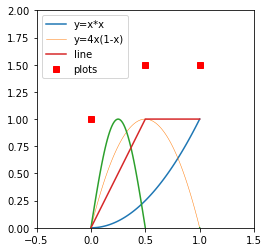

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 100)
plt.axis('scaled')
plt.axis([-0.5,1.5,0.0,2.0])
plt.plot(x, x*x, label='y=x*x')
plt.plot(x, 4*x*(1-x), label='y=4x(1-x)',linewidth=0.5)
plt.plot(x, np.sin(2*np.pi*x))
plt.plot([0,0.5,1], [0,1,1], label='line')
plt.plot([0,0.5,1], [1,1.5,1.5], 'rs', label='plots')
# rs は、red, square
plt.legend(loc='upper left')
plt.show()


sin は、math ライブラリにもあり、math.sin でも sin の値を求めることができます。それに対し、
np.sin のような、np のライブラリ関数は、ndarray も引数としてとることができるので、ndarray x に対して`np.sin(2*np.pi*x)` のように簡単にかけます。しかし、pythonで定義した関数のグラフを描こうとすると、 リスト処理の時に説明したような方法で、map やリストの内包表現でリストを作って、plot に渡す必要があります。


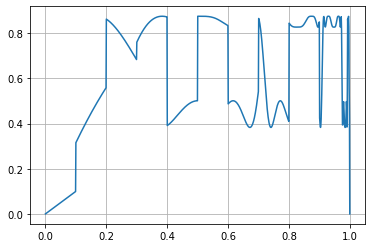

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

#例えば、こんな関数を描画しようとする。（適当に考えた関数です。）
def f(x):
    for i in range (int(x*10)):
        x = 3.5* x * (1-x)
    return x

x = np.linspace(0, 1, 1000)
plt.grid()
y = list(map(f,x))
# y = [f(i) for i in x]  # 内包表現を用いたこれでも同じ
plt.plot(x, y)
plt.show()

Interact と組み合わせると，グラフをパラメータで変化させることができます。

**練習問題** [0,1] 区間で定義されたロジスティック関数 $f(x) = ax(1-x)$ に対し，$f^n$ を描画する関数
```
logistic(a, n)
```
を作ろう。a のデフォルトの値は 4, n のデフォルトの値は 1 にしよう。

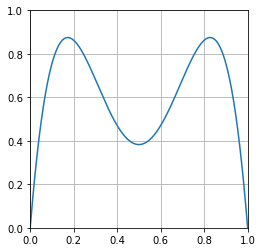

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

def logistic(a=4,n=1):
    plt.axis('scaled')
    plt.axis([0.0, 1.0, 0.0, 1.0])
    x = np.linspace(0, 1, 1000)
    y = x
    for i in range(n):
         y= y * (1-y) * a
    plt.grid()
    plt.plot(x, y)
    plt.show()

logistic(3.5, 2)


**練習問題** logistic 関数を interact で動かして，a を [0,4] で, $n$ を 1 から 10 で変化させられるようにしよう。

In [67]:
interact(logistic, a=(0, 4, 0.1), n=(0,10,1))    

interactive(children=(FloatSlider(value=4.0, description='a', max=4.0), IntSlider(value=1, description='n', ma…

<function __main__.logistic(a=4, n=1)>

**練習問題10**

0 の周りのテイラー展開（マクローリン展開）は、無限回微分可能な実数値関数 $f(x)$
に対し、
$$
\sum_{i=0}^{\infty}\frac{f^{(i)}(0)}{i!}x^n
$$
という無限級数を得ることである。
いろんな関数と $n$ に対し、$n$までの和をとったテイラー展開の近似を描いてみよう。
階乗は、math.factorial 関数を用いればよい。

まずは、$f(x) = sin(x)$ に対して行おう。まず，$sin^{(i)}(0)$ を数式で表そう。
i をもらって $sin^{(i)}(0)$ を返す d0sin という関数を作ろう。そして、n と x をもらい、sin の n 項目までの展開を返す関数 taylor(n,x)
をつくり、 それを用いて、
```
   taylorgraph(i)   (i は optional, default は 5)
```
として、i までの展開を描画する関数を作ろう。それを，Interact を用いて動かそう。

**練習問題20** 同様のことを他の関数についても行いたいが、それぞれを別に行なったのでは、きれいと言えない。描画したい関数を意味する文字列 fname と 数 n に対し、
```
   taylorgraph(fname, n)   (n は optional, default は 5)
```
で描画できるようにすることを考えよう。
その時には、"fname" という名前から、もともとの関数とi をもらい,その関数の 0 での i 回目の導関数の値を返す関数と、x , y の変化する範囲をとってこれるような辞書を作り、それに、個々の関数ごとの情報は登録しておくのがいいだろう。次のような関数について、行なってみよう。

1. $f(x) = sin(x)$    $\ \ \ (-10 \leq x \leq 10, -2 \leq y \leq 2)$

2. $f(x) = log(x+1)$  $\ \ \ (-0.9 \leq x \leq 10, -2 \leq y \leq 2)$

3. $f(x) = 1/(x+1)$ `     ` (範囲は適当に考えよう)

4. $f(x) = e^x$

それを，Interact で，関数名と，n を変化させながら描画できるようにしよう。

**練習問題21** 
$sin(x-a)$ に対して同じことができるようにし，a の値を $-2\pi$ から $2\pi$ まで動かせるようにしよう。

# 微分方程式とオイラー法

一階の微分方程式
$$
\frac{dx}{dt} = f(x, t)
$$
を考えます。$f$ によっては、この微分方程式の解となる関数が解析的に求まっていますが，ほとんどの $f$ に対してそのような $f$ を数式として求めることはできていません。そこで，コンピュータを用いて近似的に求めることが考えられます。そのような近似の方法として，オイラー法があります。この微分方程式は，時刻 $t_n$ の $x$の値が $x_n$ である時，十分小さい $\Delta$ に対して，$\Delta$ 後の $x$ の値は，
$$
x_{n+1} = f(x_n, t_n)\Delta  + x_n
$$
で近似できることを意味しています。
このことから，初期値 $x_0$ に対して，順に $x_n$ を求めていくことにより近似的に解を求めることができます。

微分方程式
$$
\frac{dx}{dt} = -x
$$
を数値的に解いて，時間 0 で x = 10 の時，時間 $t$ の $x$ の値を求めてみよう。横軸に t, 縦軸に変位 x をとって，グラフを書こう。これを解析的に解くと，
$$
x = Ce^{-t}
$$
となる。初期値を合わせると C = 10 である。そのグラフと重ね合わせてみよう。

<function matplotlib.pyplot.show(close=None, block=None)>

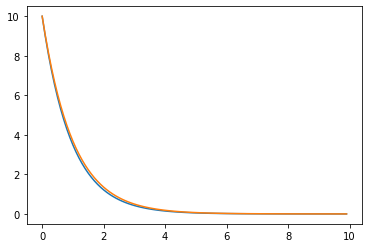

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

t = 0
x = 10
delta = 0.1
timeline = []
itinerary = []
for n in range(100):
    itinerary.append(x)
    timeline.append(t)
    x = x - x * delta
    t = t + delta
plt.plot(timeline, itinerary)

y = [10*math.e**(-t) for t in timeline]
plt.plot(timeline, y)

plt.show



二解階の微分方程式
$$
\frac{d^2x}{dt^2} = f(x, t)
$$
においても，$x$ に加えて，$y = \frac{dx}{dt}$ も変数だとして，
$$
\begin{array}{rl}
\frac{dx}{dt} &= y\\
\frac{dy}{dt} &= f(x, t)\\
\end{array}
$$
を数値的に解けば，近似解が得られます。

**練習問題30**
$$
\frac{d^2x}{dt^2} = -x
$$
を解いてみよう。初期値は x = 1 で，$\frac{dx}{dt}$（すなわち速度） の初期値は 0 としよう。これの解析的な解は，$x =  cos(t)$ です。比べよう。
$\Delta$ のとり方で，近似の精度はどう変わるかみてみよう。

詳しくは次回お話しますが，matplotlib による描画は，ここで行った，単純な手続きではなく，ax という座標軸を持ったグラフのオブジェクトに対して plot などのメソッドを呼び出して行う方が，より汎用性があります。ax は，次のようにして作ります。

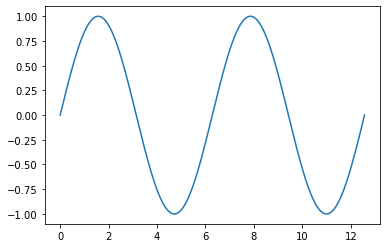

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, np.pi*4, 1000)
y = np.sin(x)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)  # ax subplot によるの作成

ax.plot(x, y)


この方法だと，
```
from mpl_toolkits.mplot3d import Axes3D
```
で Axes3D を import しておき
```
ax = plt.subplot(111, projection='3d')
```
で ax を作成すれば，
```
ax.plot(ix, iy, iz)
```
で 3 次元の描画が可能となります。

Lorenz の微分方程式と言われるものがあります。これは，気象学者 Lorenz が，大気変動モデルとして提案したものです。
$$
\begin{array}{rl}
\frac{dx}{dt} &= -px + py\\
\frac{dy}{dt} &= -xz + rx - y\\
\frac{dz}{dt} &= xy - bz\\
\end{array}
$$

このグラフ（ローレンツアトラクター）は，初期値鋭敏性といって，ほんのちょっとした初期値の違いで，全く異なった状態に到達するカオスの例として有名です。


**練習問題40** 
p = 10、r = 28、b = 8/3 という設定のもとでの，この微分方程式に従う軌跡を描画してみよう。初期値は，どこでもよいが，(1,1,1) としよう。
今回は，(x, y, z) という点が 3 次元空間でどのように移動するか，その軌跡を 3 次元プロットしよう。

**練習問題** 3 次元プロットされた絵は，
```
%matplotlib inline 
```
の代わりに
%matplotlib tk
とすると，３次元画像をマウスを用いて回転させながら見ることができる。実行してみよう。

**練習問題** オイラー法による近似はそれほど正確とは言えない。
微分方程式のよりよい近似を得る方法にルンゲクッタ法と呼ばれる方法がある。これについてネットで調べ，ルンゲクッタ法で練習問題をやり直してみよう。

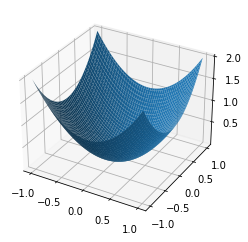

In [45]:
# 練習問題40
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def TDfigure():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
  
    x=np.linspace(-1, 1, 100)
    y=np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    Z = X*X + Y*Y
    ax.plot_surface(X, Y, Z)
    plt.show()
    
    
TDfigure()
